# PREPROCESSING

In [ ]:
# Dependencies

from sklearn import preprocessing
import numpy as np
import pandas as pd

data = np.array([[2.2, 5.9, -1.8], [5.4, -3.2, -5.1], [-1.9, 4.2, 3.2]])

# BINARIZATION

when you want to convert all values to 0 or 1, based on a certain threshold

In [4]:
bindata = preprocessing.Binarizer(threshold=1.5).transform(data)
print('Binarized data:\n\n', bindata)

Binarized data:

 [[1. 1. 0.]
 [1. 0. 0.]
 [0. 1. 1.]]


# MEAN REMOVAL
Scaling to make mean and std.deviation of one column similar to that of other columns to support kernel methods like SVM.

In [5]:
scaled_data = preprocessing.scale(data)
print('Mean (after)= ', scaled_data.mean(axis=0))
print('Standard Deviation (after)= ', scaled_data.std(axis=0))

Mean (after)=  [0.00000000e+00 0.00000000e+00 7.40148683e-17]
Standard Deviation (after)=  [1. 1. 1.]


# SCALING

StandardScaler - => features with a mean=0 and variance=1
MinMaxScaler - => features in a 0 to 1 range
Normalizer - => feature vector to a Euclidean length=1

In [ ]:
minmax_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
data_minmax = minmax_scaler.fit_transform(data)
print('MinMaxScaler applied on the data:\n', data_minmax)

# NORMALIZATION

bringing the values of each feature vector on a common scale

L1 - Least Absolute Deviations - sum of absolute values (on each row) = 1; it is insensitive to outliers (more robhust)
L2 - Least Squares - sum of squares (on each row) = 1; takes outliers in consideration during training

In [ ]:
data_l1 = preprocessing.normalize(data, norm='l1')
data_l2 = preprocessing.normalize(data, norm='l2')

# ONE HOT ENCODER

In [ ]:
data_dummies = pd.get_dummies(data)


# INITIAL PREVIEW

In [ ]:
print("This dataset has -  rows:",data.shape[0]," columns:", data.shape[1]) #rows and columns
data.head() #first few lines
data.describe() #common statistics


# TRAIN_TEST_SPLIT

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

# CLASSIFICATION ALGORITHMS

In [ ]:
# KNN 

# Considering more and more neighbors leads to a smoother decision boundary. 
# A smoother boundary corresponds to a simpler model. 

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

# loop that goes through all possibilities of n_neighbours

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

#for KNN regressor
from sklearn.neighbors import KNeighborsRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
print("Test set predictions:\n{}".format(reg.predict(X_test)))
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))


In [ ]:
# LINEAR MODELS

# Linear regression (prone to overfitting in higher dimensions)
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

#Ridge regression
#tweak alpha level to increase or decrease restriction level (0.1: minimal restriction)
#Reduce alpha when you think there is underfitting.

from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

#with enough training data, regularization becomes less important, 
#and given enough data, ridge and linear regression will have the same performance

#Lasso: some coefficients are made 0. Automatic feature selection: easier to interpret results.
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

#plotting the different coefficients of lasso 
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

# For LogisticRegression and LinearSVC the trade-off parameter that determines the strength of the regularization
# is called C,and higher values of C correspond to less regularization. 
# high c - high chance of overfitting
# a very small C corresponds to a lot of regularization

# Logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

#seeing accuracy at various levels of C
for C, marker in zip([0.001, 1, 100]:
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))



from sklearn.svm import LinearSVC()
LinearSVClinear_svm = LinearSVC().fit(X, y)
                     
# final notes
# Large values for alpha or small values for C mean simple models
# If you assume that only a few of your features are actually important, you should use L1. 
# Else, default to L2
# Linear models often perform well when the number of features is large compared to the number of samples.
# fitting and predicting in one line example - y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)

In [7]:
# CLASSIFICATION

# Decision tree - algorithms are completely invariant to scaling of the data
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

# to restrict tree depth to prevent overfitting
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

plot_feature_importances_cancer(tree)

# Random forests
# If you want to have reproducible results, it is important to fix the random_state.
# The important parameters to adjust are n_estimators, max_features, and possibly pre-pruning options like max_depth.
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

# Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0)
or GradientBoostingClassifier(random_state=0, max_depth=1)
or GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))


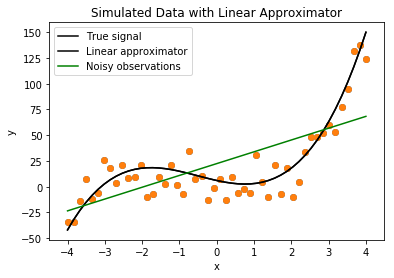

In [2]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 

# set the seed for the random number generator
# so we all work with the same data
np.random.seed(42)

def cubic_generator(x):
    """
    f(x) = 2x**3 + 3x**2 - 8x + 6
    
    :param x: x-coordinate 
    :returns: x mapped through a cubic function
    """
    return 2*x**3 + 3*x**2 - 8*x + 6

# vectorize the func so it accepts array inputs
cubic_generator = np.vectorize(cubic_generator)

# generate xcoords, the true target and noisy observations on the target
xcoords = np.linspace(-4, 4, 50)
ycoords = cubic_generator(xcoords)
noise = np.random.normal(scale=15, size=50)

# plotting
plt.plot(xcoords, ycoords, c='black')
plt.scatter(xcoords, ycoords + noise)
plt.title('Simulated Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['True signal', 'Noisy observations']);


# we'll use 1000 observations in total# we'll u 
x = np.linspace(-4, 4, 1000)
random_noise = np.random.normal(scale=15, size=1000)
y = cubic_generator(x) + random_noise

# choose the set of train indices, and derive the test indices
train_indices = np.random.choice(range(1000), replace=False, size = int(0.8*1000))
test_indices = [idx for idx in range(1000) if idx not in train_indices]

# split the data
# the reshape operation is necessary because the machine learning models
# in general expect 2D tensors
x_train = x[train_indices].reshape(-1, 1)
y_train = y[train_indices]
x_test = x[test_indices].reshape(-1, 1)
y_test = y[train_indices]

from sklearn.linear_model import LinearRegression

# create a linear regression object
linear_reg = LinearRegression()

# fit the object on training data
linear_reg = linear_reg.fit(X=x_train, y=y_train)

# training set predictions
train_preds = linear_reg.predict(x_train)

# test set predictions
test_preds = linear_reg.predict(x_test)

linear_ycoords = linear_reg.coef_ * xcoords + linear_reg.intercept_

plt.plot(xcoords, ycoords, c='black')
plt.plot(xcoords, linear_ycoords, c='green')
plt.scatter(xcoords, ycoords + noise)
plt.title('Simulated Data with Linear Approximator')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['True signal', 'Linear approximator', 'Noisy observations'])



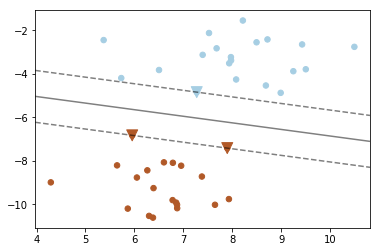

In [5]:
import numpy as np
import  matplotlib.pyplot  as plt
from sklearn import svm
from sklearn.datasets import make_blobs
%matplotlib inline

# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# choose a large penalty for the error term to simulate a maximum margin classifer
clf = svm.SVC(kernel='linear', C=1E6)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=120,
           linewidth=1, marker='v', c=y[clf.support_], cmap=plt.cm.Paired)
plt.show()